潜伏期

In [1]:
import bitermplus as btm
import pandas as pd
import tmplot
import matplotlib.pyplot as plt
import numpy as np
import dataPretreatment.preprocessText as segmentWord
import pickle as pkl
import tmplot as tmp
import matplotlib
import seaborn as sns
import dataPretreatment.divideDataVisualize as divideDataVisualize

In [2]:
df = pd.read_csv(
    'dataPretreatment/data/yq2019-12-01_2020-12-01.csv',encoding='utf-8'
)

In [15]:
# 时间搓转换
df['sendTime']=pd.to_datetime(df['sendTime'],unit='s', origin='1970-01-01 08:00:00')

In [23]:
# 时间划分
texts = []
newDf = df[df['sendTime'] >= '2019-12-01 00:00:00']
newDf = newDf[newDf['sendTime'] <= '2020-01-21 23:59:59']
#users = set(newDf['sendUserCrc32id'].to_list())
#bvnos = set(newDf['bvno'].to_list())
textList = newDf['text'].to_list()
newDf.to_csv('time.csv')
print('初始弹幕数{d}条'.format(d = len(textList)))
print('弹幕发送用户{d}个'.format(d = len(set(newDf['sendUserCrc32id'].to_list()))))

初始弹幕数726条
弹幕发送用户658个


In [24]:
# 弹幕数据预处理
import dataPretreatment.preprocessText as preprocess_text
sentences = []
preprocess_text.preprocess_text(textList, sentences)
print('预处理后的弹幕数{d}条'.format(d = len(sentences)))

预处理后的弹幕数159条


In [25]:
# BTM模型建模
X, vocabulary, vocab_dict = btm.get_words_freqs(sentences,max_df=0.8)
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(sentences, vocabulary)
#docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)
# INITIALIZING AND RUNNING MODEL
for T in range(1,31,1):
    print(T)
    model = btm.BTM(X, vocabulary, seed=12321, T=T, M=50, alpha=50/T, beta=0.01)
    model.fit(biterms, iterations=5000)
    with open("model/modelData/潜伏期/2019-12-17/"+str(T)+".pkl", "wb") as file:
        pkl.dump(model, file)
    file.close()

1


100%|██████████| 5000/5000 [00:00<00:00, 24465.14it/s]


2


100%|██████████| 5000/5000 [00:00<00:00, 15973.96it/s]


3


100%|██████████| 5000/5000 [00:00<00:00, 18389.81it/s]


4


100%|██████████| 5000/5000 [00:00<00:00, 14160.61it/s]


5


100%|██████████| 5000/5000 [00:00<00:00, 13269.87it/s]


6


100%|██████████| 5000/5000 [00:00<00:00, 12020.08it/s]


7


100%|██████████| 5000/5000 [00:00<00:00, 11022.55it/s]


8


100%|██████████| 5000/5000 [00:00<00:00, 10398.55it/s]


9


100%|██████████| 5000/5000 [00:00<00:00, 11392.73it/s]


10


100%|██████████| 5000/5000 [00:00<00:00, 10187.85it/s]


11


100%|██████████| 5000/5000 [00:00<00:00, 9452.59it/s]


12


100%|██████████| 5000/5000 [00:00<00:00, 8738.47it/s]


13


100%|██████████| 5000/5000 [00:00<00:00, 9016.84it/s]


14


100%|██████████| 5000/5000 [00:00<00:00, 7912.26it/s]


15


100%|██████████| 5000/5000 [00:00<00:00, 7818.80it/s]


16


100%|██████████| 5000/5000 [00:00<00:00, 7007.13it/s]


17


100%|██████████| 5000/5000 [00:00<00:00, 6908.59it/s]


18


100%|██████████| 5000/5000 [00:00<00:00, 5314.52it/s]


19


100%|██████████| 5000/5000 [00:00<00:00, 5651.17it/s]


20


100%|██████████| 5000/5000 [00:00<00:00, 5254.34it/s]


In [ ]:
# 计算评价指标
Ts = []
models = []
entropys = []
perplexitys = []
coherences = []

for T in range(1,21,1):
    file = open('C:/Users/Chen/Desktop/bulletProjects/TopicModel/model/modelData/潜伏期/2019-12-17/'+str(T)+'.pkl', 'rb')
    model = pkl.load(file)
    models.append(model)

    biterms = btm.get_biterms(docs_vec)
    p_zd = model.transform(docs_vec)
    file.close()
    entropys.append(btm.entropy(model.matrix_topics_words_))
    Ts.append(T)
    perplexitys.append(btm.perplexity(model.matrix_topics_words_, p_zd, X, T))
print(entropys)

100%|██████████| 159/159 [00:00<00:00, 26624.65it/s]


In [ ]:
sns.set()
sns.lineplot(x=Ts, y=entropys).figure.set_size_inches(8, 6)
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.xticks(range(1,31,1))
plt.xlabel('主题个数')
plt.ylabel('entropy')
plt.show()

In [21]:
# 获取主题
file = open('C:/Users/Chen/Desktop/bulletProjects/TopicModel/dataset/modelData/2020-02-02/6.pkl', 'rb')
model = pkl.load(file)
a = btm.get_top_topic_words(model=model, words_num=30)
print(a)
#a.to_csv('1.csv')

   topic0 topic1 topic2 topic3 topic4 topic5
0      平安     谢谢     支持     保护     场面     加油
1      好人     目泪     武汉     病毒   哈哈哈哈     武汉
2      一生     辛苦     口罩     高考     蝙蝠    热干面
3     啊啊啊     感谢     韩红     高三     大木     中国
4      口罩     吼吼   红十字会     时间     好像     湖北
5      投币     中国     捐给     在家     贝爷     粉为
6      病毒     国家     慈善     推迟     静静     广东
7      感染    目泪目    基金会     学校     野味     河南
8      医生    泪目泪     害怕     学习     地方     烩面
9      美国     遇事     涨价     复习   恍恍惚惚     山东
10     特别     不决    红十字     初三     可爱     螺蛳
11     人数    双黄连     生产     开学     声音     奥利
12     瘟疫     购买     政府     听懂     辟谣     驴肉
13     医院     中药     中国     老师   红红火火     火烧
14     这是     外国     疫情     口罩     卧槽    牛肉面
15     流感     出售     市场     感觉     督工    臭豆腐
16     一包     老人     基金     延迟     弹幕     煎饼
17     传播     活该     物资     学生    猫头鹰     面为
18     死亡   平平安安     兄弟     本来     视频     福建
19     肚子     房间     情况     考试     想到     肠粉
20     飘安    笑嘻嘻     国家     弹幕     一只    牛肉汤
21     公司 

In [19]:
stri = ''
j = 0
for i in a['topic3'].to_list():
    stri = stri + i + ' '
    if j == 9: stri = stri + '\n'
    j = j+1
print(stri)

印度 中国 上帝 国家 厕所 原因 文明 英语 国内 有个 
美国 不洁 凝聚 1962 统一 品格 政治 情况 五千年 游戏 翻译 医生 东西 发展 可不是 制度 文盲 被害 肯定 水平 


In [22]:
theta = model.theta_
print(theta)

[0.1271722  0.09543636 0.15609544 0.18687898 0.10586733 0.3285497 ]


In [16]:
# 主题强度
import math
phi = tmp.get_phi(model)
theta = tmp.get_theta(model)
doc = tmp.get_docs(model)
entropys = []
theta = theta.T
# theta 横轴：topics 纵轴：docs
#遍历文档——主题获取全部文档的信息熵
for index, row in theta.iterrows():
    entropy = 0
    for i in row.values:
        entropyTemp = i*math.log2(i+1)
        entropy = entropy + entropyTemp
    entropys.append(entropy)
# 计算文档权重
Wms = []
for entropy in entropys:
    Wm = 1-(entropy/max(entropys))
    Wms.append(Wm)
Ts = []
#遍历主题 计算主题强度
for index, row in theta.iteritems():
    # z是在计算分子
    z = []
    for i,j in zip(row.values,Wms):
         z.append(j*i)
    Ts.append(sum(z)/sum(Wms))
print(Ts)

<ipython-input-16-edc440f3a996>:18: RuntimeWarning: invalid value encountered in double_scalars
  Wm = 1-(entropy/max(entropys))


[nan, nan, nan, nan, nan, nan]


In [10]:
file = open('C:/Users/Chen/Desktop/bulletProjects/TopicModel/dataset/modelData/2019-12-17/30.pkl', 'rb')
model = pkl.load(file)
tmp.report(model=model, docs=sentences)

c:\users\chen\desktop\bulletprojects\topicmodel\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\chen\desktop\bulletprojects\topicmodel\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\chen\desktop\bulletprojects\topicmodel\venv\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
c:\users\chen\desktop\bulletprojects\topicmodel\venv\lib\site-packages\numpy\core\_metho

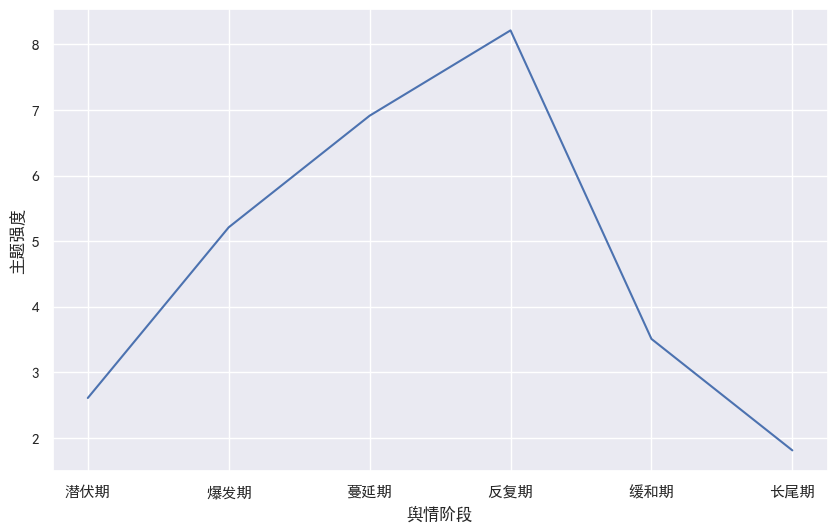

In [34]:
sns.set()
periods = ['潜伏期','爆发期','蔓延期','反复期','缓和期','长尾期']
values = [2.611642256725493,5.211642256725493,6.911642256725493,8.211642256725493,3.511642256725493,1.813642256425493]
sns.lineplot(x=periods, y=values).figure.set_size_inches(10, 6)
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
# plt.xticks(range(1,31,1))
plt.xlabel('舆情阶段')
plt.ylabel('主题强度')
plt.show()